In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Data Incubator.csv",encoding='latin-1')

In [41]:
df.head(10)

,Gam_Titlte,Score,Bes_Selling,Critic,Positiv_Review
0,Call of Duty: Modern Warfare,100.0,1,0,One of the best Call of Duty of all time: Insa...
1,Call of Duty: Modern Warfare,80.0,1,0,I got this game to have a good time and wasnt ...
2,Call of Duty: Modern Warfare,90.0,1,0,There's everything in this game that one would...
3,Call of Duty: Modern Warfare,80.0,1,0,"Believe the hype, the latest Modern Warfare re..."
4,Call of Duty: Modern Warfare,92.0,1,1,Call of Duty: Modern Warfare puts the franchis...
5,Call of Duty: Modern Warfare,90.0,1,1,"After a multiplayer-centric episode, the COD f..."
6,Call of Duty: Modern Warfare,90.0,1,1,"A great campaign, excellent multiplayer modes ..."
7,Call of Duty: Modern Warfare,90.0,1,1,The Spec Op mode is challenging and I like tha...
8,NBA 2k20,80.0,1,0,NBA 2k20 I found be very similar last years ga...
9,NBA 2k20,80.0,1,0,There?s some bugs with the progress bars not ...


In [4]:
text = df.Positiv_Review[0]
text

"One of the best Call of Duty of all time: Insane graphics, dynamic movement, ballistics, etc. It's a masterpiece.\n\nInfinity Ward did really well with this one, the combat system is really well-made, a new engine that changed everything. Despite some flaws like Survival exclusive to PS4. The introductions of the new game modes, bring variety to the Multiplayer. The gun customization are insane (You can even convert your M4A1 to a deadly 9mm Submachine Gun!) help customize your play style."

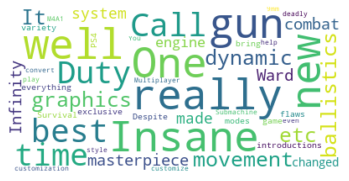

In [5]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

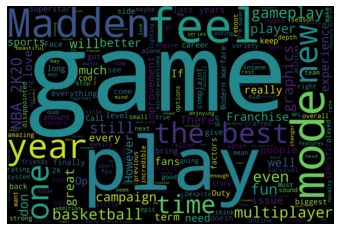

In [6]:
df1 = df.iloc[0:25]
text = df1.Positiv_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

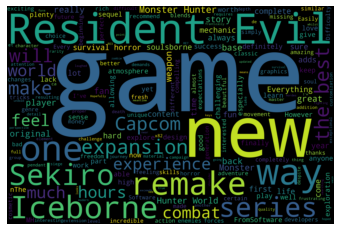

In [7]:
df2 = df.iloc[25:50]
text = df2.Positiv_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
remove_words = ['game', 'play', 'remake', 'will', 'expansion', 'resident', 'evil','Madden','game','NBA','2k20','make','Sekiro'
                'iceborne', 'feel', 'year', 'one', 'time', 'basketball','Iceborne','Capcom',"Resident Evil",'Resident','evil',
                'Capcom','new','Sekiro',"Monster hunter","Monster","Hunter","game",' great','great ', 'really', ' new',' new',
                ' way', 'way ',' way ', ' game ','game ', ' game', 'way', ' way', 'way ',
                'sekrio', 'reall', 'monster', 'hunter', 'much', 'well', 'better',  'even', 'back', 'madden', 'play', 'best']

In [9]:
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
pat

'\\b(?:game|play|remake|will|expansion|resident|evil|Madden|game|NBA|2k20|make|Sekiroiceborne|feel|year|one|time|basketball|Iceborne|Capcom|Resident Evil|Resident|evil|Capcom|new|Sekiro|Monster hunter|Monster|Hunter|game| great|great |really| new| new| way|way | way | game |game | game|way| way|way |sekrio|reall|monster|hunter|much|well|better|even|back|madden|play|best)\\b'

In [10]:
df['new'] = df['Positiv_Review'].str.replace(pat, '')

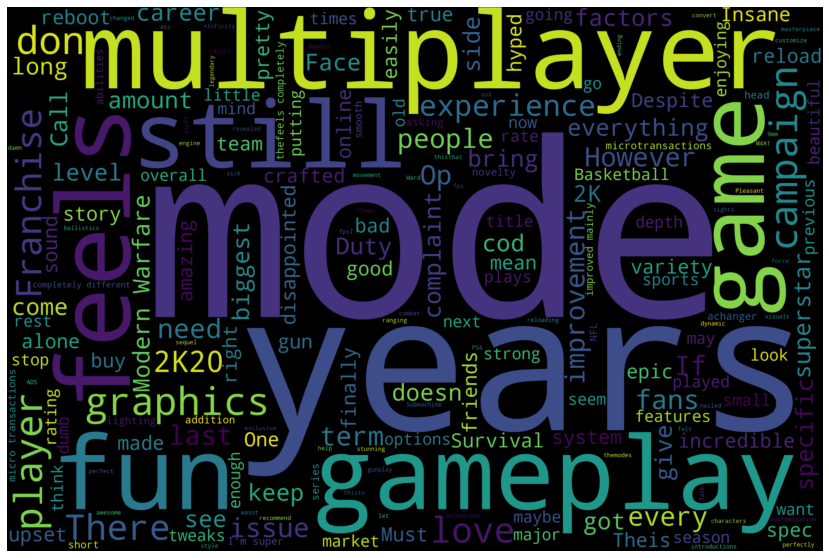

In [11]:
df1 = df.iloc[0:25]
text = df1.new.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

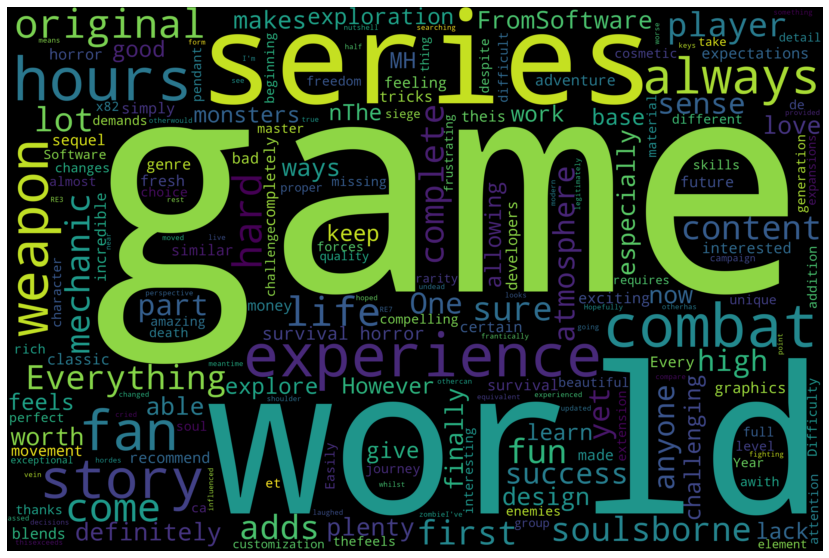

In [12]:
df2 = df.iloc[25:50]
text = df2.new.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X = df.new.values.astype('U')
y =df.Critic
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2) ,min_df=5, norm=None).fit(X)
X = vect.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
#Load a function to be used to visaulize text analysis and NLP coefficients. Courtesy of Michael Parrot of Columiba University
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

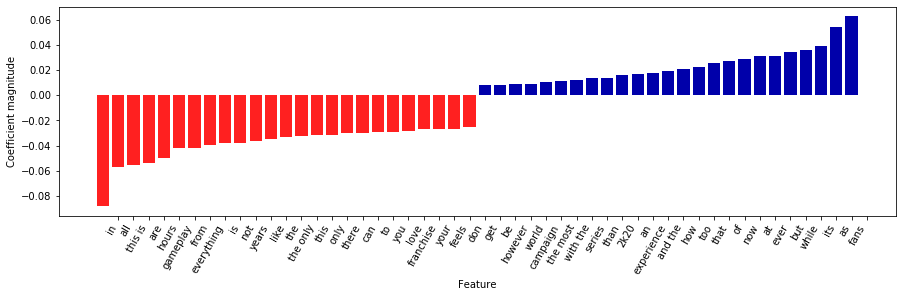

In [15]:
from sklearn.linear_model import LogisticRegression
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

In [16]:
remove_words = ['game', 'play', 'remake', 'will', 'expansion', 'resident', 'evil','Madden','game','NBA','2k20','make','Sekiro'
                'iceborne', 'feel', 'year', 'one', 'time', 'basketball','Iceborne','Capcom',"Resident Evil",'Resident','evil',
                'Capcom','new','Sekiro',"Monster hunter","Monster","Hunter","game",' great','great ', 'really', ' new',' new',
                ' way', 'way ',' way ', ' game ','game ', 'in','this','all','this is','its','but','does','how',"are","from",
                " this is", "this", "this", "this ", "there"
                'sekrio', 'reall', 'monster', 'hunter', 'much', 'well', 'better',  'even', 'back', 'madden', 'play', 'best']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
pat
df['new'] = df['Positiv_Review'].str.replace(pat, '')

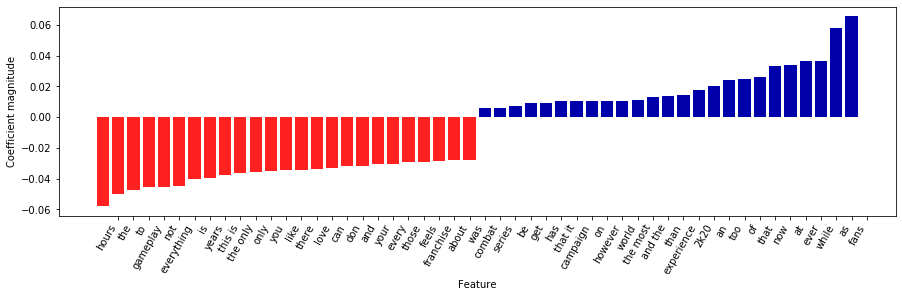

In [17]:
from sklearn.model_selection import train_test_split
X = df.new.values.astype('U')
y =df.Critic
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,3) ,min_df=5, norm=None).fit(X)
X = vect.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LogisticRegression
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

In [36]:
df['world'] = df.new.str.count('world')
df['mode1'] = df.new.str.count('mode')

In [37]:
df.mode1

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     3
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    0
18    1
19    2
20    2
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    1
42    0
43    0
44    0
45    0
46    0
47    0
48    0
Name: mode1, dtype: int64

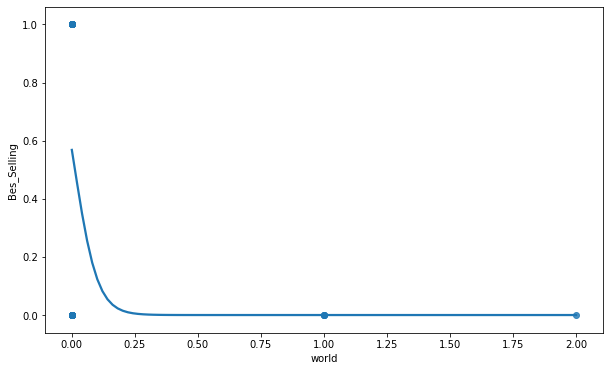

In [27]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot('world' ,'Bes_Selling', ci=None, data = df, logistic=True)

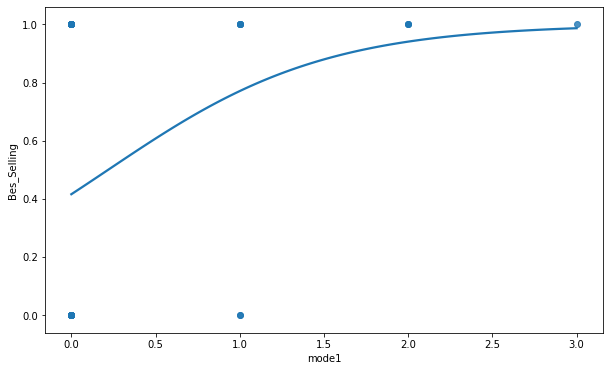

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot('mode1','Bes_Selling', ci=None, data = df, logistic=True)